In [172]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
#import matplotlib.cm as cm
#import pandas as pd
#import seaborn as sns
#from scipy import stats

In [ ]:
#datafolder = "/home/hlane/gizmo-public/custom/gmc_MHD/output" #add if file is not stored in yt-conda

In [177]:
f = h5py.File("snapshot_859" + ".hdf5", "r")  #opens file
rho = np.array(f["PartType0"]["Density"])

rho_0 = np.mean(rho)
logRho_0 = np.log10(rho_0)
logRho = np.log10(rho)
s = np.log10(26 * rho)
sigma = np.std(s)
s_0 = np.mean(s)
f.close()

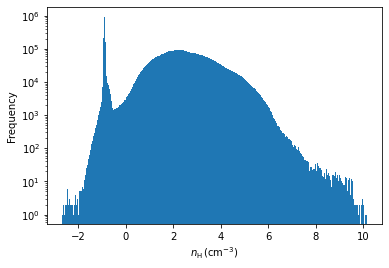

In [178]:
#logDensity = np.array(logDensity)
plt.hist(s, bins = 1000)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)") 
plt.ylabel('Frequency')
plt.yscale('log', base = 10)
plt.show()


<ipython-input-179-e28a0dac4006>:3: RuntimeWarning: divide by zero encountered in log10
  log10Frequency = np.log10(frequencies)


Text(0, 0.5, 'Frequency')

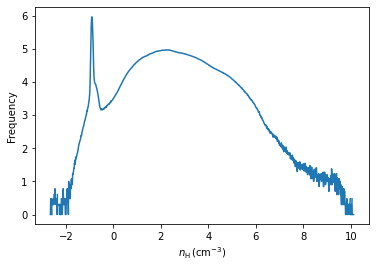

In [179]:
frequencies, edges = np.histogram(s, bins = 1000)
s_centers = np.array((edges[1:]+edges[:-1])/2)
log10Frequency = np.log10(frequencies)
plt.plot(s_centers, log10Frequency)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)")
plt.ylabel('Frequency')

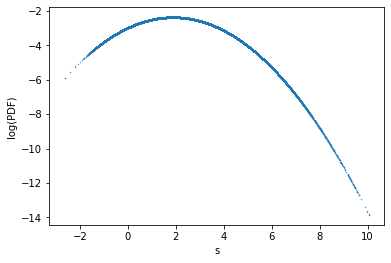

In [180]:
firstHalf = (np.sqrt(2*np.pi*(sigma))**2)**-1
internals = (s - s_0)**2 / (2*(sigma)**2)
secondHalf = np.exp(-1*internals)

pdf = firstHalf * secondHalf
plt.scatter(s[::a], np.log(pdf[::a]), marker=".", s = 0.5,)
plt.xlabel('s') 
plt.ylabel('log(PDF)')
plt.show()

In [ ]:
#Power law tail attempt
fit = np.polyfit(s_centers, log10Frequency, 30)
p = np.poly1d(fit)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(s_centers, log10Frequency, 30))

xp = np.linspace(-2, 6, 100)

_ = plt.plot(s_centers, log10Frequency, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.show()